In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from itertools import zip_longest

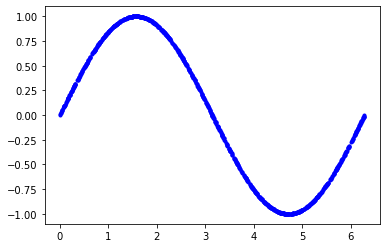

In [2]:
samples = 1000
seed = 1337
np.random.seed(seed)
tf.random.set_seed(seed)
# generating random values for x as x_values
x_values = np.random.uniform(low=0, high=2*math.pi, size=samples)
np.random.shuffle(x_values)
# generating y values from our randomly generated x_values
y_values = np.sin(x_values)
# plotting the x and y values 
plt.plot(x_values, y_values, "b.")
plt.show()

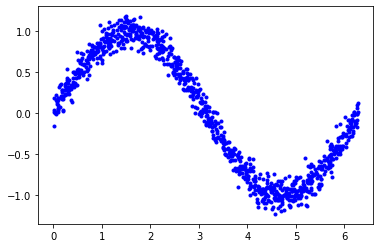

In [3]:
# Adding little noises to our values 
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, "b.")
plt.show()

In [4]:
# splitting the data
train_split = int(0.6 * samples)
test_split = int(0.2 * samples + train_split)
# using numpy split method to split our data
x_train, x_validate, x_test = np.split(x_values, [train_split, test_split])
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])
# doublechecking to see if all the splits add up to the samples
assert(len(x_train) + len(x_validate) + len(x_test)) == samples

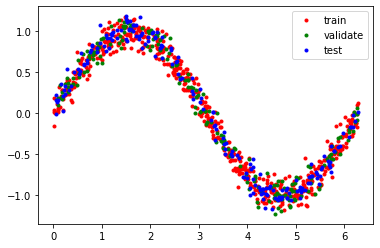

In [5]:
# plotting all the values i.e x_train, x_validate and x_test

plt.plot(x_train, y_train, "r.", label = "train")
plt.plot(x_validate, y_validate, "g.", label = "validate")
plt.plot(x_test, y_test, "b.", label = "test")
plt.legend()
plt.show()

In [6]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
# first layer( scalar input through 16 neurons)
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# final layer( single neuron) since the out put is a single value
model_1.add(layers.Dense(1))
# compiling the model using standard optimizer and a loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [9]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 7ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.

In [7]:
help(np.split)

Help on function split in module numpy:

split(ary, indices_or_sections, axis=0)
    Split an array into multiple sub-arrays as views into `ary`.
    
    Parameters
    ----------
    ary : ndarray
        Array to be divided into sub-arrays.
    indices_or_sections : int or 1-D array
        If `indices_or_sections` is an integer, N, the array will be divided
        into N equal arrays along `axis`.  If such a split is not possible,
        an error is raised.
    
        If `indices_or_sections` is a 1-D array of sorted integers, the entries
        indicate where along `axis` the array is split.  For example,
        ``[2, 3]`` would, for ``axis=0``, result in
    
          - ary[:2]
          - ary[2:3]
          - ary[3:]
    
        If an index exceeds the dimension of the array along `axis`,
        an empty sub-array is returned correspondingly.
    axis : int, optional
        The axis along which to split, default is 0.
    
    Returns
    -------
    sub-arrays : list 

In [8]:
# b = np.array([1,2,3,4,5])
# a = 0.1*np.random.randn(5)
# d = a + b
# c = zip_longest(a,b)
# print(tuple(c))
# print(d)